<a href="https://colab.research.google.com/github/Venkatpandey/DataScience_ML/blob/main/ROC_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Import the libraries*

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## *Get the data*
source: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/Venkatpandey/DataScience_ML/main/dataset/diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values

In [9]:
data.shape

(768, 9)

In [7]:
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [10]:
print(y.size)

768


## *Train-Test split*

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4)

## *Feature Scaling* - Done to normalize all the feartures, as some features having low data points and others sinificantly high

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## *SVM classifier*

In [14]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)

## *Logistic Classifier*

In [15]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)

## *Plot ROC and compare AUC*
For more info visit: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

<built-in method view of numpy.ndarray object at 0x7f6148b6b350>


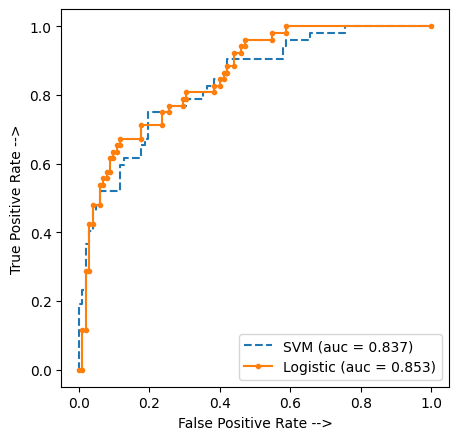

In [21]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='--', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [24]:
print(threshold)

[ 2.83245528  1.83245528  1.27314962  1.20114479  1.15960756  1.15023859
  0.69271217  0.65078714  0.60493939  0.59611765  0.50216311  0.49485566
  0.47599428  0.43387514  0.32657257  0.24658447  0.1424183   0.14227935
  0.13981521 -0.04627843 -0.10679616 -0.12291144 -0.15734195 -0.15851339
 -0.19841213 -0.41844452 -0.43116368 -0.50009081 -0.52355303 -0.64991021
 -0.65927296 -0.68763741 -0.70773534 -0.83443714 -0.84796014 -0.92003602
 -0.96920882 -1.20416649 -1.23093209 -1.2398836  -1.25407809 -1.37727923
 -1.37939055 -1.5261305  -1.52685305 -1.9168445 ]
